In [1]:
import os
import numpy as np
from sklearn import tree
from sklearn.linear_model import LinearRegression
import csv
import tensorflow.keras as kr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plots style & size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 10)

# Import csv file and load into data variable
filename="powerproduction.csv"

data = np.loadtxt(filename, delimiter=",", skiprows=1)

# Split numpy array into two arrays, a two dimensional array for x-values, and one dimensional for y-values.
x = data[:,[0]].reshape(-1)
y = (data[:,[1]]).reshape(-1)

In [3]:
# Create pandas dataframe with x and y values formatted 1-dimensionally
train = pd.DataFrame()
train['x'] = x
train['y'] = y

print(train)

          x    y
0     0.000  0.0
1     0.125  0.0
2     0.150  0.0
3     0.225  0.0
4     0.275  0.0
..      ...  ...
495  24.775  0.0
496  24.850  0.0
497  24.875  0.0
498  24.950  0.0
499  25.000  0.0

[500 rows x 2 columns]


Text(0.5, 0, 'Speed')

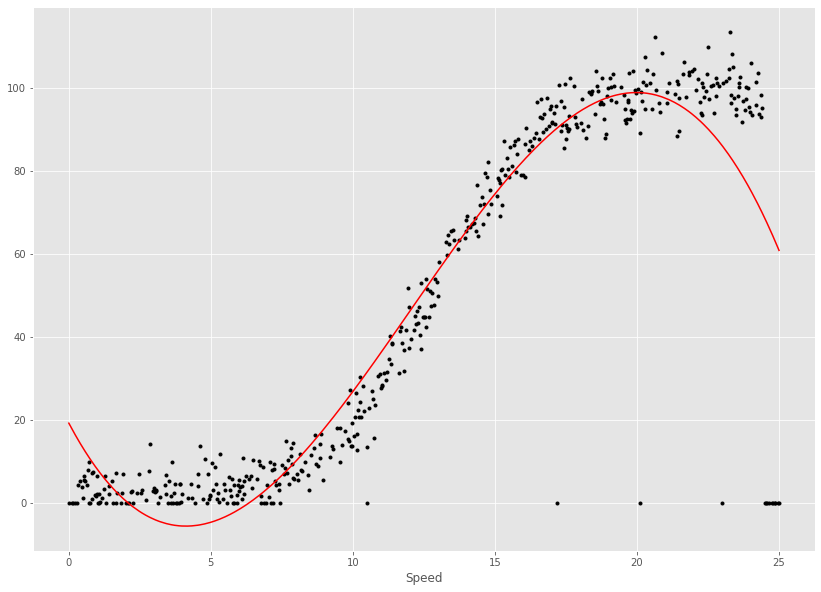

In [4]:
# Plot data for visualization
# The graph looks like a cubic function, f(x) = ax^3 + bx^2 + cx + d
a,b,c,d = np.polyfit(x, y, 3)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x * x + c * x + d, 'r-')
plt.xlabel("Speed")

## Enterpreting data according to the graph
When points are arranged in this type of pattern, and not randomly dispersed about the line, linear regression is not the best predictor for getting results.

According to an environmental research letter which discusses the topic of predicting turbine power output with wind speed, I quote, *The power output from the turbine is not a linear function of wind speed (figure 3), so, multivariate linear regression is not an appropriate technique. Non-linear regression assumes that the relationships are constant throughout the model space (i.e. power output is always proportional to Un), which from figure 3 is incorrect, so non-linear regression is also inappropriate. Also, multivariate bins only work where the training data includes data in all bins and so would be computationally or observationally more expensive. Instead, a technique is required that can capture non-linear changes in response to forcing. For this reason, we propose a machine learning technique called 'regression trees'*[1].

In [5]:
# Using keras neural network to try to predict values.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [6]:
# Train network with our data
model.fit(train['x'], train['y'], epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 533us/step - loss: 2760.1729
Epoch 2/500
16/16 [==============================] - 0s 467us/step - loss: 2625.9777
Epoch 3/500
16/16 [==============================] - 0s 400us/step - loss: 2534.2172
Epoch 4/500
16/16 [==============================] - 0s 467us/step - loss: 2534.6057
Epoch 5/500
16/16 [==============================] - 0s 467us/step - loss: 2417.2887
Epoch 6/500
16/16 [==============================] - 0s 466us/step - loss: 2469.3527
Epoch 7/500
16/16 [==============================] - 0s 466us/step - loss: 2449.0269
Epoch 8/500
16/16 [==============================] - 0s 467us/step - loss: 2439.4675
Epoch 9/500
16/16 [==============================] - 0s 467us/step - loss: 2220.0637
Epoch 10/500
16/16 [==============================] - 0s 467us/step - loss: 2314.2838
Epoch 11/500
16/16 [==============================] - 0s 467us/step - loss: 2254.9999
Epoch 12/500
16/16 [==============================] - 0s 400us/

16/16 [==============================] - 0s 400us/step - loss: 1158.0991
Epoch 97/500
16/16 [==============================] - 0s 467us/step - loss: 1077.0659
Epoch 98/500
16/16 [==============================] - 0s 467us/step - loss: 1140.3323
Epoch 99/500
16/16 [==============================] - 0s 467us/step - loss: 1086.4006
Epoch 100/500
16/16 [==============================] - 0s 467us/step - loss: 1066.5262
Epoch 101/500
16/16 [==============================] - 0s 467us/step - loss: 1041.2702
Epoch 102/500
16/16 [==============================] - 0s 400us/step - loss: 1091.4378
Epoch 103/500
16/16 [==============================] - 0s 467us/step - loss: 1116.1205
Epoch 104/500
16/16 [==============================] - 0s 466us/step - loss: 1074.8432
Epoch 105/500
16/16 [==============================] - 0s 400us/step - loss: 1096.6869
Epoch 106/500
16/16 [==============================] - 0s 400us/step - loss: 1033.5751
Epoch 107/500
16/16 [==============================] - 0s 46

16/16 [==============================] - 0s 400us/step - loss: 630.7235
Epoch 192/500
16/16 [==============================] - 0s 400us/step - loss: 550.3178
Epoch 193/500
16/16 [==============================] - 0s 467us/step - loss: 647.6483
Epoch 194/500
16/16 [==============================] - 0s 467us/step - loss: 632.5142
Epoch 195/500
16/16 [==============================] - 0s 467us/step - loss: 600.7120
Epoch 196/500
16/16 [==============================] - 0s 467us/step - loss: 610.1721
Epoch 197/500
16/16 [==============================] - 0s 400us/step - loss: 603.5004
Epoch 198/500
16/16 [==============================] - 0s 467us/step - loss: 651.9047
Epoch 199/500
16/16 [==============================] - 0s 467us/step - loss: 636.1400
Epoch 200/500
16/16 [==============================] - 0s 467us/step - loss: 615.5920
Epoch 201/500
16/16 [==============================] - 0s 467us/step - loss: 628.9174
Epoch 202/500
16/16 [==============================] - 0s 467us/step

16/16 [==============================] - 0s 467us/step - loss: 575.0624
Epoch 287/500
16/16 [==============================] - 0s 400us/step - loss: 546.8534
Epoch 288/500
16/16 [==============================] - 0s 467us/step - loss: 591.8843
Epoch 289/500
16/16 [==============================] - 0s 400us/step - loss: 484.3902
Epoch 290/500
16/16 [==============================] - 0s 400us/step - loss: 602.1000
Epoch 291/500
16/16 [==============================] - 0s 467us/step - loss: 510.2154
Epoch 292/500
16/16 [==============================] - 0s 400us/step - loss: 471.2538
Epoch 293/500
16/16 [==============================] - 0s 400us/step - loss: 548.0837
Epoch 294/500
16/16 [==============================] - 0s 400us/step - loss: 438.9497
Epoch 295/500
16/16 [==============================] - 0s 400us/step - loss: 578.7249
Epoch 296/500
16/16 [==============================] - 0s 400us/step - loss: 495.4493
Epoch 297/500
16/16 [==============================] - 0s 400us/step

16/16 [==============================] - 0s 467us/step - loss: 498.7352
Epoch 382/500
16/16 [==============================] - 0s 467us/step - loss: 561.9745
Epoch 383/500
16/16 [==============================] - 0s 400us/step - loss: 567.9908
Epoch 384/500
16/16 [==============================] - 0s 400us/step - loss: 448.5462
Epoch 385/500
16/16 [==============================] - 0s 467us/step - loss: 546.3313
Epoch 386/500
16/16 [==============================] - 0s 400us/step - loss: 520.2864
Epoch 387/500
16/16 [==============================] - 0s 400us/step - loss: 462.0381
Epoch 388/500
16/16 [==============================] - 0s 467us/step - loss: 481.7808
Epoch 389/500
16/16 [==============================] - 0s 467us/step - loss: 674.4359
Epoch 390/500
16/16 [==============================] - 0s 467us/step - loss: 457.2863
Epoch 391/500
16/16 [==============================] - 0s 467us/step - loss: 604.6004
Epoch 392/500
16/16 [==============================] - 0s 467us/step

16/16 [==============================] - 0s 400us/step - loss: 471.7617
Epoch 477/500
16/16 [==============================] - 0s 467us/step - loss: 609.7161
Epoch 478/500
16/16 [==============================] - 0s 400us/step - loss: 540.6410
Epoch 479/500
16/16 [==============================] - 0s 467us/step - loss: 522.7909
Epoch 480/500
16/16 [==============================] - 0s 400us/step - loss: 581.5314
Epoch 481/500
16/16 [==============================] - 0s 467us/step - loss: 588.3679
Epoch 482/500
16/16 [==============================] - 0s 467us/step - loss: 555.4174
Epoch 483/500
16/16 [==============================] - 0s 400us/step - loss: 494.2232
Epoch 484/500
16/16 [==============================] - 0s 466us/step - loss: 555.4870
Epoch 485/500
16/16 [==============================] - 0s 400us/step - loss: 557.8227
Epoch 486/500
16/16 [==============================] - 0s 467us/step - loss: 520.8310
Epoch 487/500
16/16 [==============================] - 0s 467us/step

In [7]:
# Predict values with model created with Keras
model.predict([1.5, 5.5, 10.5, 25, 30])

array([[  6.381232],
       [ 22.602297],
       [ 42.878628],
       [101.67999 ],
       [121.95632 ]], dtype=float32)

***The results obtained from linear regression predictions are obviously highly innacurate when trying to predict values that aren't a linear function, so I tried to find a decision tree model in the Keras documentation or StackOverflow. I decided to go with sci-kit learn's decision tree as it was still providing accurate results and is recommended by the Environmental reserarch letter[1].***

In [18]:
x = data[:,[0]]
decision_tree_model = tree.DecisionTreeRegressor().fit(x, y)

In [19]:
pred = decision_tree_model.predict([[15]])
print(pred)

[73.911]


According to the powerproduction dataset, a speed of 15.065 generates a power value of 73.911. So the model is pretty accurate.

## References

[1] Clifton, A., Kilcher, L., Lundquist, J.K. and Fleming, P., 2013. Using machine learning to predict wind turbine power output. Environmental research letters, 8(2), p.024009.